# Network analysis of DBLP co-authorship network


This is the co-authorship network of the DBLP computer science bibliography. Nodes are authors and an undirected edge between two nodes exists if the corresponding authors have published at least one paper together.

In [1]:
%matplotlib inline

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

category: Coauthorship

code: CD

name: DBLP co-authorship

description: User–user co-authorships

url: http://snap.stanford.edu/data/com-DBLP.html

cite: konect:leskovec2012

extr: snap

entity-names: author

relationship-names: co-authorship 

long-description: This is the co-authorship network of the DBLP computer science bibliography. Nodes are authors and an undirected edge between two nodes exists if the corresponding authors have published at least one paper together.

## Columns

First column: ID of from node 

Second column: ID of to node

In [2]:
df = pd.read_csv("dbpl_data/data", sep="\s+", names=["aOne","aTwo"])

Graph input


In [3]:
G = nx.from_pandas_dataframe(df, "aOne", 'aTwo', True)

## 1. The number of nodes and edges:

In [4]:
print("Number of nodes:", len(G.nodes()))

Number of nodes: 317080


In [5]:
print("Number of edges:", len(G.edges()))

Number of edges: 1049866


In [89]:
random_G = nx.gnm_random_graph(3170, 10498)

## 2. Draw the histogram of degrees. Compare the distribution with the distribution for a random graph having the same average degree. Discuss the results.

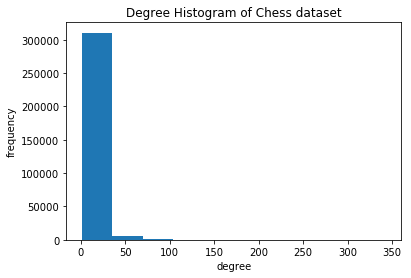

In [7]:
deg_seq = [G.degree(x) for x in nx.nodes(G) if G.degree(x) < 120]
plt.hist(deg_seq)
plt.title('Degree Histogram of dbpl dataset')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

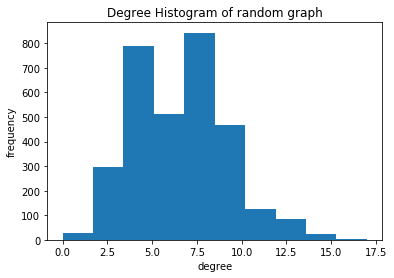

In [8]:
deg_seq = [random_G.degree(x) for x in nx.nodes(random_G) if random_G.degree(x) < 35]
plt.hist(deg_seq)
plt.title('Degree Histogram of random graph')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

### Discuss the results

To do

## 3. Draw the histogram of clustering coefficient, and the average clustering coefficient. Compare it with the one of a random graph and discuss the results.

### 3.1 Clustering coefficient

In [29]:
clustering = nx.algorithms.cluster.clustering(G)

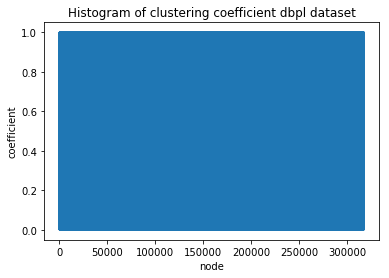

In [33]:
plt.plot(*zip(*sorted(clustering.items())))
plt.title('Histogram of clustering coefficient dbpl dataset')
plt.xlabel('node')
plt.ylabel('coefficient')
plt.show()

In [34]:
clustering_random = nx.algorithms.cluster.clustering(random_G)

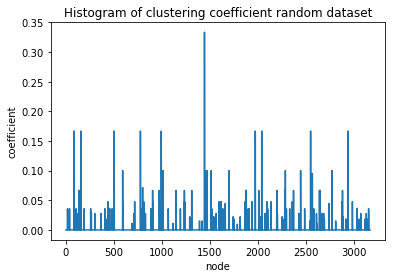

In [35]:
plt.plot(*zip(*sorted(clustering_random.items())))
plt.title('Histogram of clustering coefficient random dataset')
plt.xlabel('node')
plt.ylabel('coefficient')
plt.show()

### Discuss the results

to do


### 3.2 Average clustering coefficient

In [47]:
clustering_avg = nx.algorithms.cluster.average_clustering(G)

In [48]:
random_clustering_avg = nx.algorithms.cluster.average_clustering(random_G)

In [50]:
"""plt.plot(*zip(*sorted(clustering_avg.items())))
plt.title('Histogram of average clustering coefficient dbpl dataset')
plt.xlabel('node')
plt.ylabel('coefficient')
plt.show()"""

"plt.plot(*zip(*sorted(clustering_avg.items())))\nplt.title('Histogram of average clustering coefficient dbpl dataset')\nplt.xlabel('node')\nplt.ylabel('coefficient')\nplt.show()"

In [49]:
print (clustering_avg, random_clustering_avg)

0.6324308280637565 0.002309572399106634


### Discuss the results

to do


## 4. Draw the histogram of distances in the graphs, the diameter and the average distance. Compare with random graphs and discuss the results.

### 4.1 Diameter of the graph

In [53]:
#diameter = nx.algorithms.distance_measures.diameter(G)

In [55]:
#diameter = nx.algorithms.distance_measures.center(random_G)

In [ ]:
#nx.average_shortest_path_length(G)

### 4.2 Average distance

## 5. Detect the communities in the graph, and discuss the results.

to do


In [108]:
"""communities_generator = nx.community.asyn_lpa_communities(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)"""

'communities_generator = nx.community.asyn_lpa_communities(G)\ntop_level_communities = next(communities_generator)\nnext_level_communities = next(communities_generator)'

In [ ]:
# networkx.algorithms.voronoi.voronoi_cells

## 6. Count the number the triangles in the graph, and compare to a random graph.

### 6.1 calculate triangles in dbpl dataset

In [56]:
triangles = nx.triangles(G)
# this is a dictionnary!

In [69]:
total = 0
for x in triangles.values():
    total += x

### 6.2 calculate triangles in dbpl dataset

In [64]:
random_triangles = nx.triangles(random_G)


In [67]:
random_total = 0
for x in random_triangles.values():
    random_total += x

In [71]:
print(total, random_total)

6673155 153


## 7. Compute and discuss other centrality measures: betweenness, PageRank

### 7.1 Comparison of betweenness

In [75]:
#egde_between_cent = nx.edge_betweenness_centrality(G)

In [77]:
#between_cent = nx.betweenness_centrality(G)

In [78]:
random_egde_between_cent = nx.edge_betweenness_centrality(random_G)

In [80]:
random_between_cent = nx.betweenness_centrality(random_G)

### 7. 2 Comparison of Page Rank

In [81]:
pagerank = nx.pagerank(G)

In [90]:
random_pagerank = nx.pagerank(random_G)

## 8. Comparison of Clique

In [87]:
clique = nx.algorithms.clique.graph_clique_number(G)


In [91]:
random_clique = nx.algorithms.clique.graph_clique_number(random_G)


## 9. Find next co-authors

In [98]:
predictions = nx.algorithms.link_prediction.jaccard_coefficient(G)
#preds = nx.jaccard_coefficient(G, [(0, 1), (2, 3)])
#for u, v, p in predictions:
#    '(%d, %d) -> %.8f' % (u, v, p)

## maybe evolution of this dataset

## Conclusion